<a href="https://colab.research.google.com/github/elizabethyoo/team_9/blob/dabl/eda_dabl_fulldataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merge Datasets

Here we will joined the cleaned datasets for:
- Small Business Pulse Survey
- Household Pulse Survey
- Unemployment Rate

Datasets will be joined on date and state.



#Setup

**Mount Google Drive**

To have access to the shared group 9 project folder, first create a shortcut to it in your drive. Then run the cell below to mount your google drive and follow the prompt to get the code.

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [38]:
# Imports
!pip install dabl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import pandas as pd
import time
import dabl
from dabl import plot


In [4]:
root_path = '/content/gdrive/MyDrive/team_9/Datasets/'

## Import States Key

Keys to help with merging

In [ ]:
states = pd.read_csv(root_path + 'state_key.csv', dtype={"ps_id":str})
state_key = {key:value for (key,value) in zip(states.ps_id,states.abrv)}

In [ ]:
h_ind = ['STATE_ABBR',
 'YEAR',
 'MONTH',
 'AGE_GRP_18_24',
 'AGE_GRP_25_39',
 'AGE_GRP_40_49',
 'AGE_GRP_50_59',
 'AGE_GRP_60_69',
 'AGE_GRP_70_up',
 'AGE_GRP_less_18',
 'COVID_VACC_DOSE_not_plan_all_dose',
 'COVID_VACC_DOSE_plan_to_receive_all_doses',
 'COVID_VACC_DOSE_received_all_doses',
 'EDUCATION_bachelor_or_higher',
 'EDUCATION_high_school_diploma_GED',
 'EDUCATION_less_high school',
 'EDUCATION_some_college_asscte_degree',
 'INCOME_BEFORE_TAX_$100,000_$149,999',
 'INCOME_BEFORE_TAX_$150,000_$199,999',
 'INCOME_BEFORE_TAX_$200,000_above',
 'INCOME_BEFORE_TAX_$25,000_$34,999',
 'INCOME_BEFORE_TAX_$35,000_$49,999',
 'INCOME_BEFORE_TAX_$50,000_$74,999',
 'INCOME_BEFORE_TAX_$75,000_$99,999',
 'INCOME_BEFORE_TAX_Less_$25,000',
 'RACE_Any_other_race_alone_or_mixed_race',
 'RACE_Asian,_alone',
 'RACE_Black_alone',
 'RACE_White_alone',
 'FOOD_SCARCITY',
 'HOUSING_INSECURITY',
 'MALE',
 'FEMALE',
 'HISPANIC_ORIGIN',
 'RECVD_COVID_VACC',
 'CHILDCARE_ISSUE',
 ]

In [ ]:
s_ind = ['STATE_ABBR',
 'YEAR',
 'MONTH',
 'Expected recovery index',
 'Financial stress index',
 'Market challenges index',
 'Market(s) challenges index',
 'Operational challenges index',
 'Overall sentiment index',
]

# Import the three datasets

In [23]:
df = pd.read_csv('/content/gdrive/MyDrive/team_9/Datasets/hps_sbps_unemp_merged.csv')

In [24]:
df = df.drop(columns = df.columns[0])
df['DAY'] = np.ones((800,1))
df['DATE'] = pd.to_datetime(df2[["YEAR","MONTH","DAY"]])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   STATE_ABBR                                 800 non-null    object        
 1   YEAR                                       800 non-null    int64         
 2   MONTH                                      800 non-null    int64         
 3   AGE_GRP_18_24                              800 non-null    float64       
 4   AGE_GRP_25_39                              800 non-null    float64       
 5   AGE_GRP_40_49                              800 non-null    float64       
 6   AGE_GRP_50_59                              800 non-null    float64       
 7   AGE_GRP_60_69                              800 non-null    float64       
 8   AGE_GRP_70_up                              800 non-null    float64       
 9   AGE_GRP_less_18      

In [41]:
df_clean = dabl.clean(df)

Target looks like regression
Showing only top 10 of 39 continuous features


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 2 outliers in column unemployment_rate.
  int(dropped), series.name), UserWarning)


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f821050eb90>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82102875d0>,
       dtype=object)]

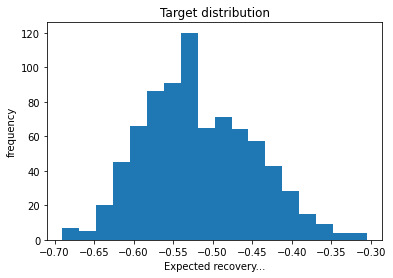

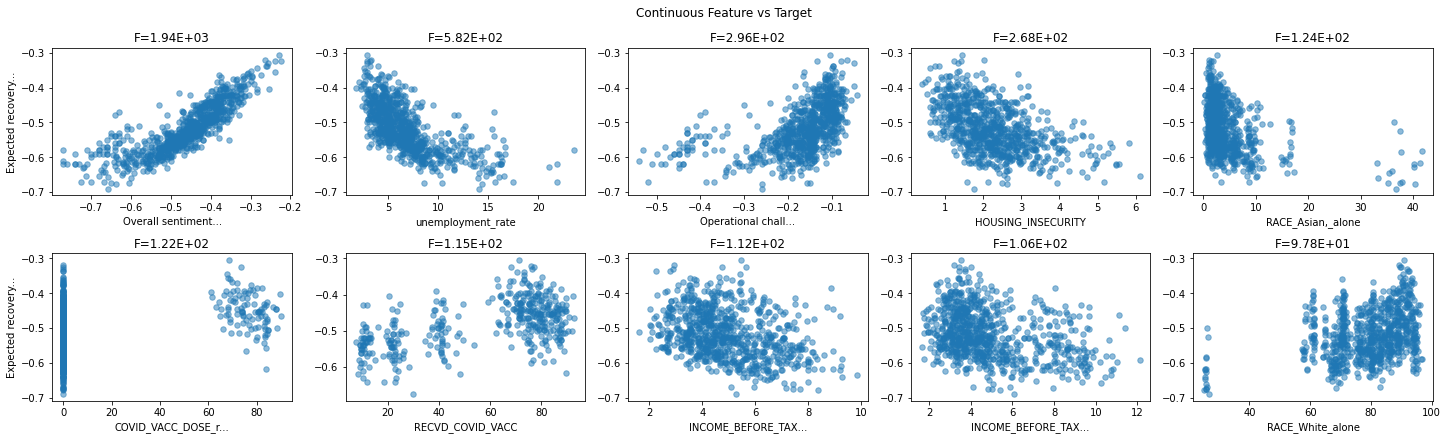

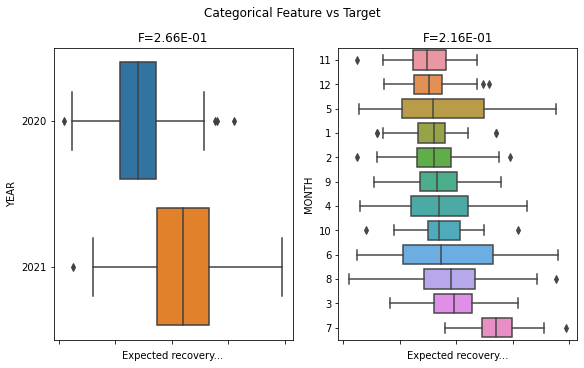

In [42]:
plot(df_clean, target_col = 'Expected recovery index')

In [45]:
ec = dabl.SimpleRegressor(random_state = 0).fit(df_clean, target_col = 'Expected recovery index')

Running DummyRegressor()
r2: -0.009 neg_mean_squared_error: -0.005
=== new best DummyRegressor() (using r2):
r2: -0.009 neg_mean_squared_error: -0.005

Running DecisionTreeRegressor(max_depth=1)
r2: 0.554 neg_mean_squared_error: -0.002
=== new best DecisionTreeRegressor(max_depth=1) (using r2):
r2: 0.554 neg_mean_squared_error: -0.002

Running DecisionTreeRegressor(max_depth=5)
r2: 0.776 neg_mean_squared_error: -0.001
=== new best DecisionTreeRegressor(max_depth=5) (using r2):
r2: 0.776 neg_mean_squared_error: -0.001

Running Ridge(alpha=10)
r2: 0.902 neg_mean_squared_error: -0.000
=== new best Ridge(alpha=10) (using r2):
r2: 0.902 neg_mean_squared_error: -0.000

Running Lasso(alpha=10)
r2: -0.009 neg_mean_squared_error: -0.005

Best model:
Ridge(alpha=10)
Best Scores:
r2: 0.902 neg_mean_squared_error: -0.000


Selecting features this time

In [51]:
h_ind = ['STATE_ABBR',
 'DATE',
 'RACE_Asian,_alone',
 'RACE_Black_alone',
 'RACE_White_alone',
 'INCOME_BEFORE_TAX_Less_$25,000',
 'FOOD_SCARCITY',
 'HOUSING_INSECURITY',
 'RECVD_COVID_VACC',
 'CHILDCARE_ISSUE',
 'Financial stress index',
 'Market(s) challenges index',
 'Operational challenges index',
 'unemployment_rate',
 'Expected recovery index',
 'Overall sentiment index',
 'MONTH',
 'YEAR',
 ]
df2 = df_clean[h_ind]

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:548: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 2 outliers in column unemployment_rate.
  int(dropped), series.name), UserWarning)
/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 1 outliers in column INCOME_BEFORE_TAX_Less_$25,000.
  int(dropped), series.name), UserWarning)


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f820c106ad0>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f820c16f490>,
       dtype=object)]

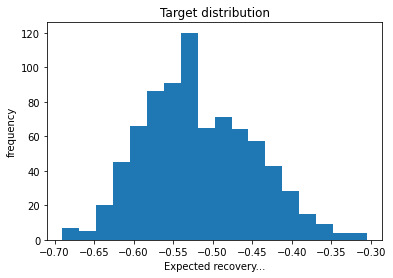

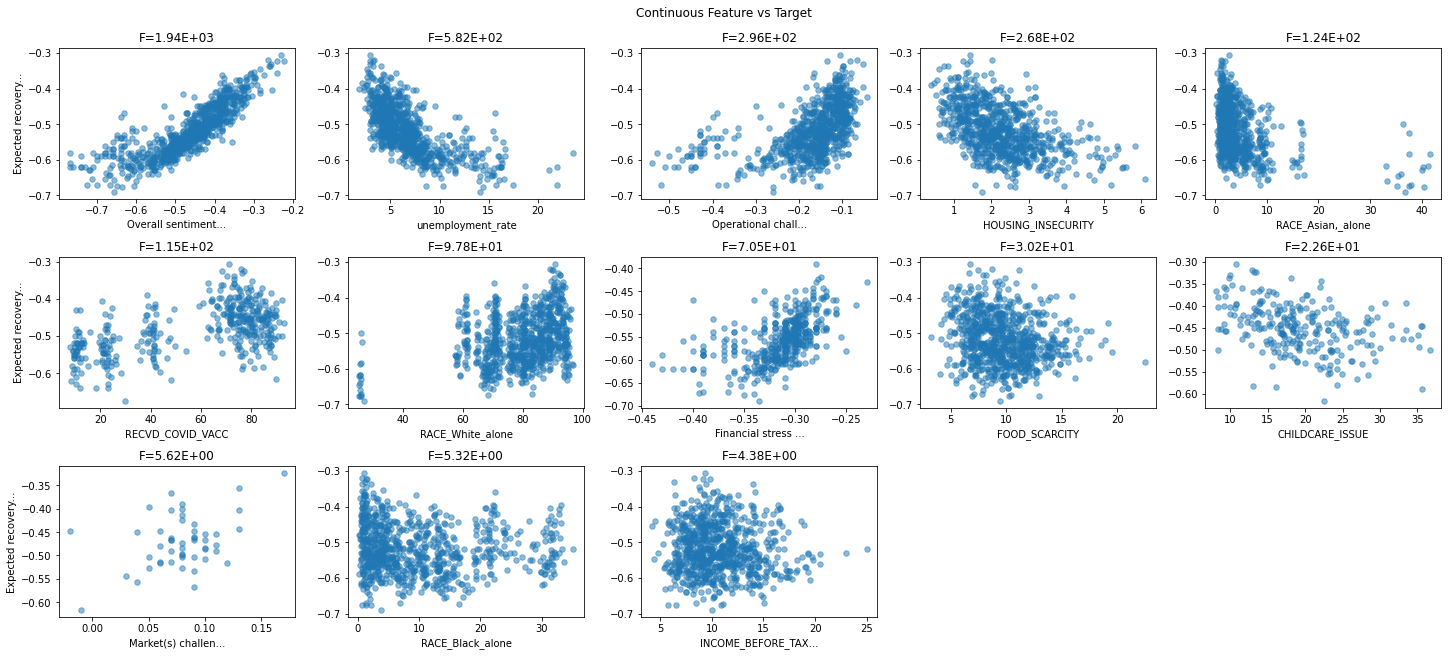

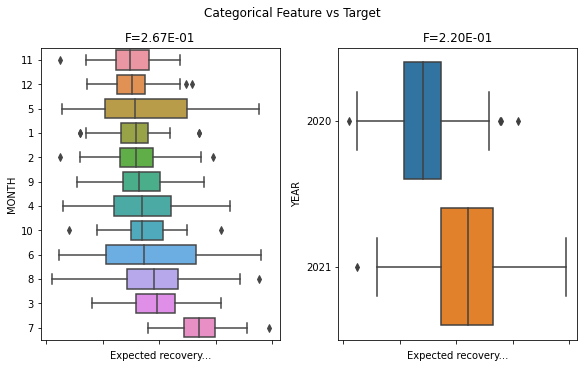

In [58]:
plot(df2, 'Expected recovery index')

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:548: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like regression


/usr/local/lib/python3.7/dist-packages/dabl/plot/utils.py:633: UserWarning: Dropped 1 outliers in column INCOME_BEFORE_TAX_Less_$25,000.
  int(dropped), series.name), UserWarning)


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f820ca5fd10>,
       dtype=object), None]

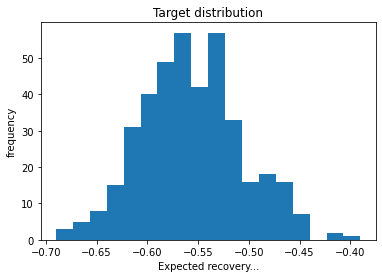

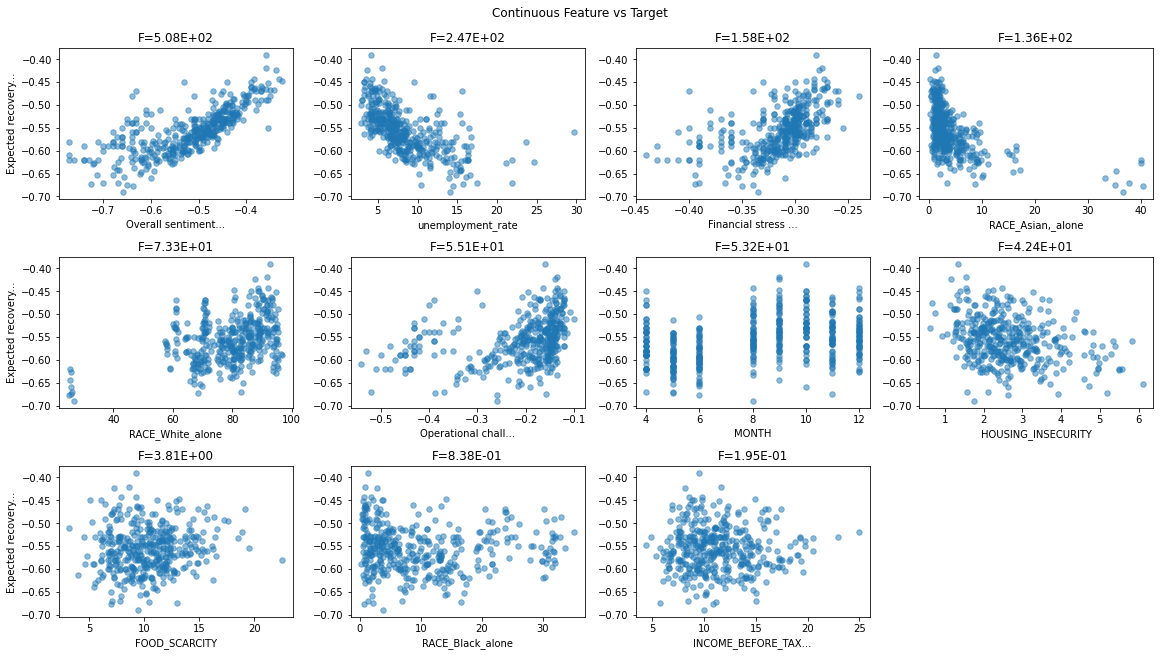

In [56]:
plot(df2[df2['YEAR'] == '2020'], 'Expected recovery index')

/usr/local/lib/python3.7/dist-packages/dabl/plot/supervised.py:548: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  FutureWarning)


Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f820c702390>,
       dtype=object), None]

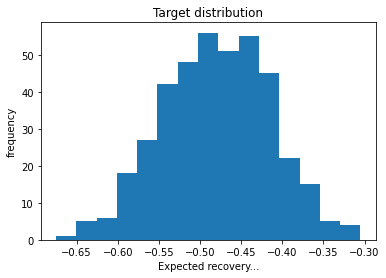

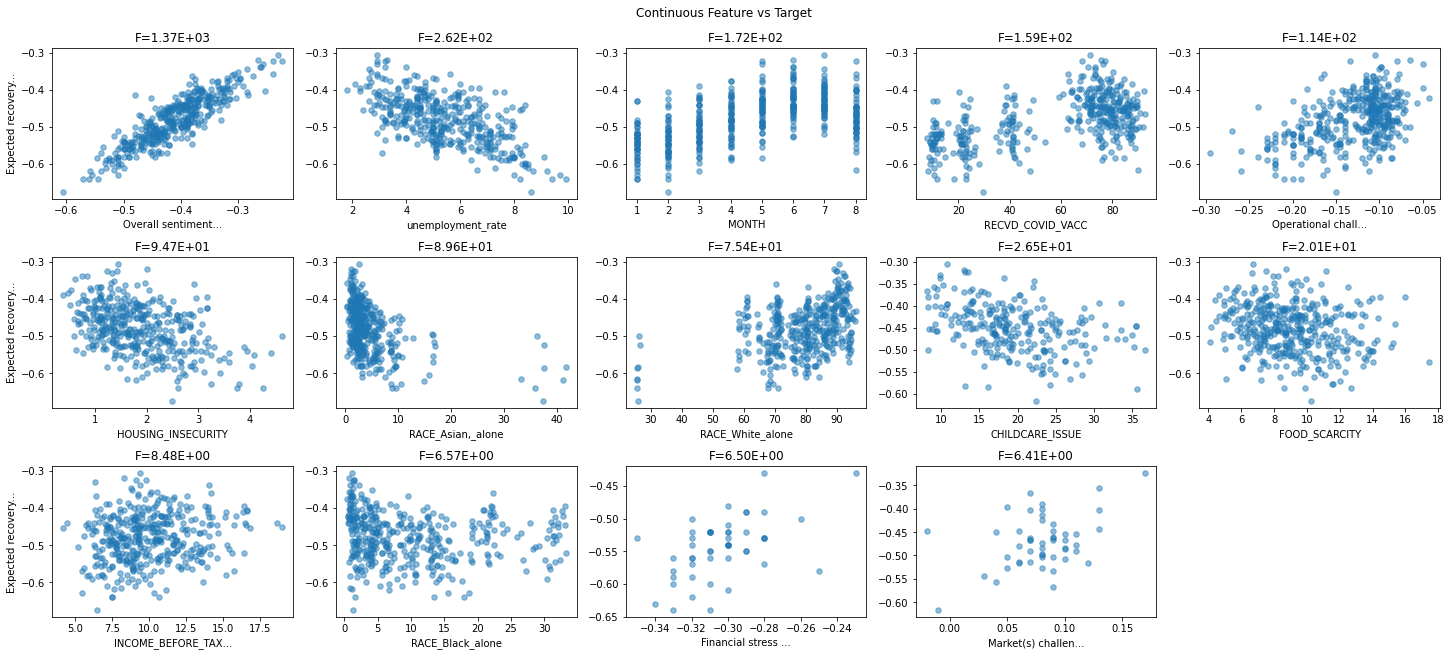

In [57]:
plot(df2[df2['YEAR'] == '2021'], 'Expected recovery index')